#Comparar DM una sin y otra con ligando

Este cuaderno de ipython es propiedad de:
* El laboratorio de Diseño de Fármacos, Universidad de Concepción.
En convenio con:
* Datagen Limitada, Chile.

- Autor  : Dr. Alexis Salas Burgos
- Fecha  : Junio 2016
- Versión: 1.0 

#1. Utilizando Prody

In [2]:
from prody import parsePDB, parseDCD
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
work_dir  = "/Users/alsalas/Desktop/Práctico DM 2016/namd-tutorial-files"
os.chdir(work_dir)

In [4]:
!ls

1-1-build     1-4-gbis      2-3-energies  2-6-heat-diff 3-2-pullcf    common
1-2-sphere    2-1-rmsd      2-4-temp      2-7-echoes    CVS
1-3-box       2-2-maxwell   2-5-spec-heat 3-1-pullcv    README


In [51]:
PSF1        = 'common/ubq_ws.psf'
DCD1        = '1-2-sphere/ubq_ws_eq.dcd'
PSF2        = 'common/ubq_wb.psf'
DCD2        = '1-3-box/ubq_wb_eq.dcd'

In [ ]:
## Aquí voy

In [37]:
structure1 = parsePDB('common/ubq_ws.pdb')
ensemble1  = parseDCD(DCD1)
ensemble1.setAtoms(structure1)
ensemble1.setCoords(structure1)

structure2 = parsePDB('common/ubq_wb.pdb')
ensemble2  = parseDCD(DCD2)
ensemble2.setAtoms(structure2)
ensemble2.setCoords(structure2)

@> 6682 atoms and 1 coordinate set(s) were parsed in 0.04s.
DEBUG:.prody:6682 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> WARNING DCD header claims 0 frames, file size indicates there are actually 10 frames.
@> DCD file contains 10 coordinate sets for 6682 atoms.
INFO:.prody:DCD file contains 10 coordinate sets for 6682 atoms.
@> DCD file was parsed in 0.00 seconds.
INFO:.prody:DCD file was parsed in 0.00 seconds.
@> 0.76 MB parsed at input rate 724.39 MB/s.
INFO:.prody:0.76 MB parsed at input rate 724.39 MB/s.
@> 10 coordinate sets parsed at input rate 9470 frame/s.
INFO:.prody:10 coordinate sets parsed at input rate 9470 frame/s.
@> 7051 atoms and 1 coordinate set(s) were parsed in 0.04s.
DEBUG:.prody:7051 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> WARNING DCD header claims 0 frames, file size indicates there are actually 10 frames.
@> DCD file contains 10 coordinate sets for 7051 atoms.
INFO:.prody:DCD file contains 10 coordinate sets for 7051 atoms.
@> DCD fi

In [18]:
structure1.getSegnames()

array(['U', 'U', 'U', ..., 'WT1', 'WT1', 'WT1'], 
      dtype='|S6')

In [57]:
#Concatenando Trajectorias catDCD
#traj = Trajectory('mdm2.dcd')
#repr(traj)
#'<Trajectory: mdm2 (next 0 of 500 frames; 1449 atoms)>'

#traj.addFile('mdm2sim2.dcd')
#repr(traj)
#'<Trajectory: mdm2 (2 files; next 0 of 1000 frames; 1449 atoms)>'

In [84]:
CDR_L1 = (26,36)
CDR_L2 = (51,57)
CDR_L3 = (90,99)
CDR_H1 = (157,168)
CDR_H2 = (183,198)
CDR_H3 = (231,242)
all_CDR = [CDR_L1, CDR_L2, CDR_L3, CDR_H1, CDR_H2, CDR_H3]

In [19]:
#Esto se hace si posees DM de distinto tamaño
print len(ensemble1)#20 ns
print len(ensemble2)#10 ns
ensemble1 = ensemble1[0:500]
print len(ensemble1)

10
10
10


In [38]:
#Only protein
ensemble1.setAtoms(structure1.select('protein'))
ensemble2.setAtoms(structure2.select('protein'))

#2. RMSD

In [22]:
ensemble1.superpose()
ensemble2.superpose()
rmsd1 = ensemble1.getRMSDs()
rmsd2 = ensemble2.getRMSDs()

@> Superposition completed in 0.02 seconds.
DEBUG:.prody:Superposition completed in 0.02 seconds.
@> Superposition completed in 0.01 seconds.
DEBUG:.prody:Superposition completed in 0.01 seconds.


In [23]:
import numpy as np
print max(np.diff(rmsd1))
print max(np.diff(rmsd2))

0.219012627166
0.182932163302


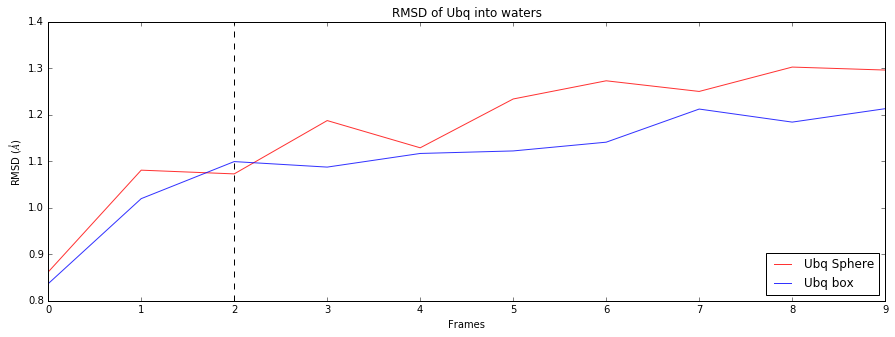

In [32]:
import pylab
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

#x = [x*(0.02) for x in range (len(rmsd1))]
x = [x*(1) for x in range (len(rmsd1))]

ax.plot(x, rmsd1, "r-", linewidth = 1, alpha = 0.8, label = "Ubq Sphere")
ax.plot(x, rmsd2, "b-", linewidth = 1, alpha = 0.8, label = "Ubq box")

#ax.plot(x[:-1], [y*10 for y in np.diff(rmsd1)], "g-", linewidth = 1, alpha = 0.8, label = "RMSD diff")
#ax.plot(x[:-1], [y*10 for y in np.diff(rmsd2)], "b-", linewidth = 1, alpha = 0.8, label = "RMSD diff")

ax.set_xlabel("Frames")
ax.set_ylabel(r"RMSD ($\AA$)")
ax.set_title("RMSD of Ubq into waters")
ax.legend(loc=4)

#ax.set_xlim([0, 1026])
ax.axvline(x=2,color='k',ls='dashed')
#axvline(x=342,color='k',ls='dashed')
#axvline(x=513,color='k',ls='dashed')
#axvline(x=684,color='k',ls='dashed')
#axvline(x=855,color='k',ls='dashed')

fig.set_size_inches(15, 5, forward=True)

pylab.savefig("Ubq_RMSD.svg", dpi=200)
pylab.savefig("Ubq_RMSD.png", dpi=200)

#3. RMSF

In [39]:
ensemble1 = ensemble1[:]
ensemble2 = ensemble2[:]
rmsf1 = ensemble1.getRMSFs()
rmsf2 = ensemble2.getRMSFs()

In [40]:
print len(rmsf1)
print len(rmsf2)
rmsf1

1231
1231


array([ 0.35148269,  0.4796749 ,  0.49885796, ...,  0.90125101,
        0.93011936,  0.91016067])

##Graficar

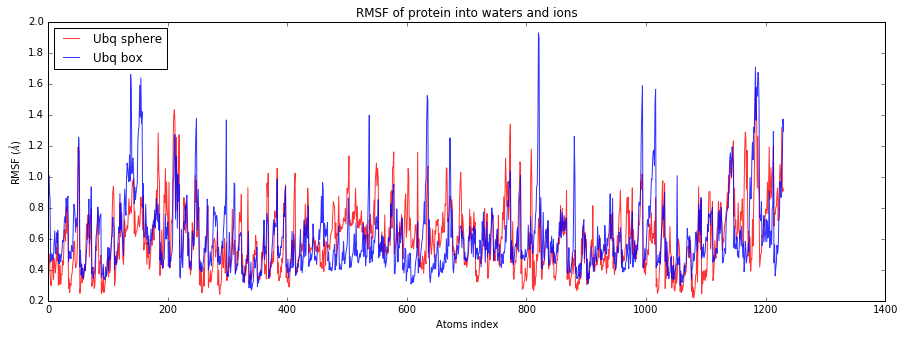

In [42]:
import pylab
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

x = len(rmsf1)

ax.plot(rmsf1, "r-", linewidth = 1, alpha = 0.8, label = "Ubq sphere")
ax.plot(rmsf2, "b-", linewidth = 1, alpha = 0.8, label = "Ubq box")
#ax.plot(rmsf3, "g-", linewidth = 1, alpha = 0.8, label = "RMSF pH 7.4")
ax.set_xlabel("Atoms index")
ax.set_ylabel(r"RMSF ($\AA$)")
ax.set_title("RMSF of protein into waters and ions")
ax.legend(loc=2)
#ax.set_xlim([0, 1026])
#axvline(x=171,color='k',ls='dashed')
#axvline(x=342,color='k',ls='dashed')
#axvline(x=513,color='k',ls='dashed')
#axvline(x=684,color='k',ls='dashed')
#axvline(x=855,color='k',ls='dashed')

fig.set_size_inches(15, 5, forward=True)

pylab.savefig("Ubq_RMSF_fullATOM.svg", dpi=200)
pylab.savefig("Ubq_RMSF_fullATOM.png", dpi=200)

#4. RMSF por residuos promedios

In [43]:
def rmsf_res(protein, rmsf):
    import numpy as np
    rmsf_AVG = []
    atoms_count = 0
    for res in protein.residues:
        anterior = atoms_count
        atoms_count += len(res.atoms)
        rmsf_average = np.average(rmsf[anterior:atoms_count])
        rmsf_residue = rmsf[anterior:atoms_count]
        rmsf_AVG.append(rmsf_average)
    return rmsf_AVG

In [58]:
#La selección de las proteinas la realizamos con mdAnalysis 
#debido a que es mas facil iterar en esta clase que en la 
#estructura de prody para residuos
import MDAnalysis 
u1 = MDAnalysis.Universe(PSF1, DCD1)
protein1 = u1.select_atoms("protein")
print protein1

u2 = MDAnalysis.Universe(PSF2, DCD2)
protein2 = u2.select_atoms("protein")
print protein2

<AtomGroup with 1231 atoms>
<AtomGroup with 1231 atoms>


In [59]:
rmsf_AVG1 = rmsf_res(protein1, rmsf1)
rmsf_AVG2 = rmsf_res(protein2, rmsf2)

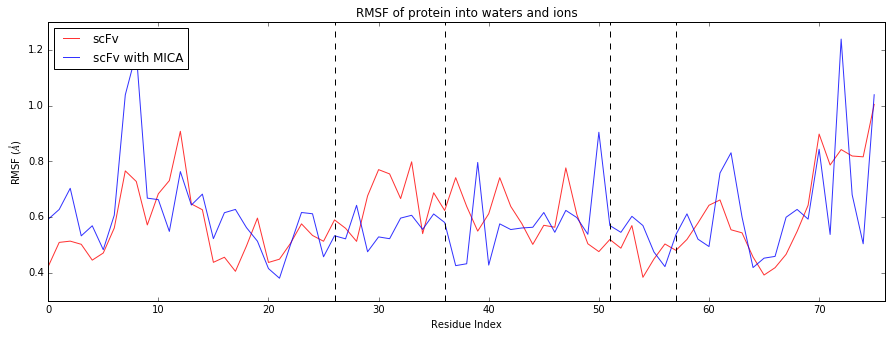

In [60]:
import pylab
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

x = len(rmsf_AVG1)

ax.plot(rmsf_AVG1, "r-", linewidth = 1, alpha = 0.8, label = "scFv")
ax.plot(rmsf_AVG2, "b-", linewidth = 1, alpha = 0.8, label = "scFv with MICA")
#ax.plot(rmsf3, "g-", linewidth = 1, alpha = 0.8, label = "RMSF pH 7.4")
ax.set_xlabel("Residue Index")
ax.set_ylabel(r"RMSF ($\AA$)")
ax.set_title("RMSF of protein into waters and ions")
ax.legend(loc=2)
ax.set_xlim([0, x])

#CDR-L
axvline(x=26,color='k',ls='dashed')
axvline(x=36,color='k',ls='dashed')
axvline(x=51,color='k',ls='dashed')
axvline(x=57,color='k',ls='dashed')
axvline(x=90,color='k',ls='dashed')
axvline(x=99,color='k',ls='dashed')

#CDR-H
axvline(x=157,color='k',ls='dashed')
axvline(x=168,color='k',ls='dashed')
axvline(x=183,color='k',ls='dashed')
axvline(x=198,color='k',ls='dashed')
axvline(x=231,color='k',ls='dashed')
axvline(x=242,color='k',ls='dashed')

fig.set_size_inches(15, 5, forward=True)

pylab.savefig("scFv_MICA_RMSF_RES2.svg", dpi=200)
pylab.savefig("scFv_MICA_RMSF_RES2.png", dpi=200)

In [64]:
def rmsf_res(protein, rmsf, rango):
    rmsf_atom = []
    num_atom  = []
    label_atom = []
    for res in protein.residues[rango[0]:rango[1]+1]:
        for at in res.atoms:
            if at.name.startswith('H'):
                "remove hydrogens"
                pass
            else:
                num_atom.append(at.number)
                label = "%s" % (at.name)#, at.resnum, at.resname)
                label_atom.append(label)
                rmsf_atom.append(rmsf[int(at.number)])
    return label_atom, num_atom, rmsf_atom

In [61]:
def do_plot(title, rmsf_atom1, rmsf_atom2):
    import pylab
    import matplotlib.pyplot as plt
    import numpy as np

    fig, ax = plt.subplots()

    n_groups = len(rmsf_atom1)
    print n_groups
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.4

    rects1 = plt.bar(index, rmsf_atom1, bar_width,
                     alpha=opacity,
                     color='b',
                     #yerr=std_men,
                     #error_kw=error_config,
                     label='scFv')

    rects1 = plt.bar(index+ bar_width, rmsf_atom2, bar_width,
                     alpha=opacity,
                     color='r',
                     #yerr=std_men,
                     #error_kw=error_config,
                     label='scFv-MICA')

    plt.xticks(index + bar_width, label_atom1)#, rotation='vertical')

    ax.set_xlabel("Atoms")
    ax.set_ylabel(r"RMSF ($\AA$)")
    ax.set_title("RMSF of %s" % title)
    #ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.legend(loc=1)
    #ax.set_xlim([0, 260])
    ax.set_ylim([0, 6])

    #CDR-L
    #axvline(x=26,color='k',ls='dashed')
    fig.set_size_inches(10, 5, forward=True)
    
    pylab.savefig("scFv_MICA_RMSF_%s.png" % title, dpi=200)
    pylab.savefig("scFv_MICA_RMSF_%s.svg" % title, dpi=200)

18
18


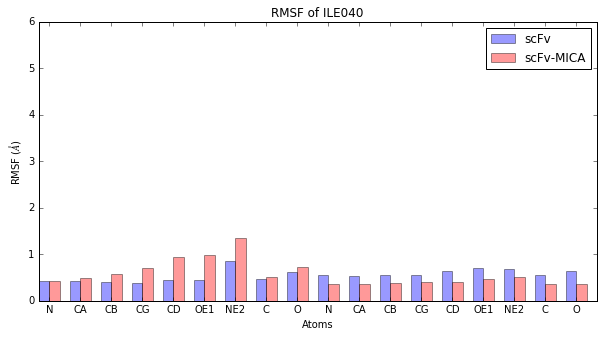

In [67]:
resi  = 40
resn  = protein1.resnames[resi]
title = "%s%03d" % (resn, resi)
rango = (resi-1,resi)
label_atom1, num_atom1, rmsf_atom1 = rmsf_res(protein1, rmsf1, rango)
label_atom2, num_atom2, rmsf_atom2 = rmsf_res(protein2, rmsf2, rango) 
print len(rmsf_atom1)
do_plot(title, rmsf_atom1, rmsf_atom2)